(코드관리자) 서울시립대학교 통계학과 전종준 (jj.jeon@uos.ac.kr)

# 3-1-2
- 네이버 API를 통해서 데이터를 수집하고 정리해본다.

In [ ]:
#%%
import urllib.request
import pandas as pd

#%%
client_id = ''
client_secret = ''


In [ ]:
#문자 만들기
topic = urllib.parse.quote('나스닥')
print(topic)

%EB%82%98%EC%8A%A4%EB%8B%A5


In [ ]:
#문자 100개요청
item = str(100)

In [ ]:
#주소에 내가 원하는 topic을 붙여서 검색해 url완성
url = 'https://openapi.naver.com/v1/search/news.xml?query=' + topic # xml 결과
url

'https://openapi.naver.com/v1/search/news.xml?query=%EB%82%98%EC%8A%A4%EB%8B%A5'

In [ ]:
# url = "https://openapi.naver.com/v1/search/news?query=" # json 결과
#text만 있던 곳에 id, password넣게 한다. header안에 넣기
request = urllib.request.Request(url)
request.add_header('X-Naver-Client-ID', client_id)
request.add_header('X-Naver-Client-Secret', client_secret)

In [ ]:
request

In [ ]:
#네이버에서 정보가 전달됨
response = urllib.request.urlopen(request)

In [ ]:
rescode = response.getcode()

In [ ]:
#200이 뜨면 성공!, 400은 실패!
rescode

200

In [ ]:
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - news ::&apos;나스닥&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Wed, 12 Apr 2023 10:45:20 +0900</lastBuildDate><total>609292</total><start>1</start><display>10</display><item><title>&amp;quot;美 물가상승률 6% 넘으면 S&amp;amp;P 500 지수 최소 2% 하락&amp;quot;</title><originallink>http://www.wowtv.co.kr/NewsCenter/News/Read?articleId=A202304120119&amp;t=NN</originallink><link>https://n.news.naver.com/mnews/article/215/0001094901?sid=101</link><description>S&amp;amp;P500 지수는 전장보다 0.17포인트(0.00%), &lt;b&gt;나스닥&lt;/b&gt;지수는 52.48포인트(0.43%) 각각 떨어졌다. 지난해부터 미국 연방준비제도(연준·Fed)가 공격적으로 금리를 인상한 이후 CPI는 주식 시장 변동성을 높인 요인 중 하나가... </description><pubDate>Wed, 12 Apr 2023 10:42:00 +0900</pubDate></item><item><title>&amp;apos;키움 &lt;b&gt;나스닥&lt;/b&gt;100 ETF 스마트인베스터 분할매수 펀드&amp;apos; 판매 개시</title><originallink>http://www.lcnews.co.kr/news/articleView.html?idxno=49124<

In [ ]:
news_xml = response_body.decode('utf-8')

In [ ]:
news_xml

'<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - news ::&apos;나스닥&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Wed, 12 Apr 2023 10:45:20 +0900</lastBuildDate><total>609292</total><start>1</start><display>10</display><item><title>&amp;quot;美 물가상승률 6% 넘으면 S&amp;amp;P 500 지수 최소 2% 하락&amp;quot;</title><originallink>http://www.wowtv.co.kr/NewsCenter/News/Read?articleId=A202304120119&amp;t=NN</originallink><link>https://n.news.naver.com/mnews/article/215/0001094901?sid=101</link><description>S&amp;amp;P500 지수는 전장보다 0.17포인트(0.00%), &lt;b&gt;나스닥&lt;/b&gt;지수는 52.48포인트(0.43%) 각각 떨어졌다. 지난해부터 미국 연방준비제도(연준·Fed)가 공격적으로 금리를 인상한 이후 CPI는 주식 시장 변동성을 높인 요인 중 하나가... </description><pubDate>Wed, 12 Apr 2023 10:42:00 +0900</pubDate></item><item><title>&amp;apos;키움 &lt;b&gt;나스닥&lt;/b&gt;100 ETF 스마트인베스터 분할매수 펀드&amp;apos; 판매 개시</title><originallink>http://www.lcnews.co.kr/news/articleView.html?idxno=49124

In [ ]:
#xpath=.//item에 있는 정보를 읽는다.
#describtion:기사의 요약정보
news = pd.read_xml(news_xml, xpath = './/item')
news

,title,originallink,link,description,pubDate
0,&quot;美 물가상승률 6% 넘으면 S&amp;P 500 지수 최소 2% 하락&q...,http://www.wowtv.co.kr/NewsCenter/News/Read?ar...,https://n.news.naver.com/mnews/article/215/000...,"S&amp;P500 지수는 전장보다 0.17포인트(0.00%), <b>나스닥</b>...","Wed, 12 Apr 2023 10:42:00 +0900"
1,&apos;키움 <b>나스닥</b>100 ETF 스마트인베스터 분할매수 펀드&apo...,http://www.lcnews.co.kr/news/articleView.html?...,http://www.lcnews.co.kr/news/articleView.html?...,키움투자자산운용이 &apos;키움 <b>나스닥</b>100 ETF Smart Inv...,"Wed, 12 Apr 2023 10:40:00 +0900"
2,"코스피 개인 외국인 매수세에 장중 2550선 강보합, 코스닥은 소폭 내려",https://www.businesspost.co.kr/BP?command=arti...,https://www.businesspost.co.kr/BP?command=arti...,다우존스30산업평균지수(0.29%)가 올랐고 <b>나스닥</b>지수(-0.43%)가...,"Wed, 12 Apr 2023 10:38:00 +0900"
3,"[종합] 코스피, 개인·외국인 ‘사자’에 장초반 강보합",https://www.etoday.co.kr/news/view/2239729,https://www.etoday.co.kr/news/view/2239729,"S&amp;P500지수는 0.17포인트(0.0%) 하락한 4108.94에, 기술주 ...","Wed, 12 Apr 2023 10:36:00 +0900"
4,"&apos;매각 실패&apos; 손정의 반도체 회사 ARM, <b>나스닥</b> 상장한다",http://news.mt.co.kr/mtview.php?no=20230412101...,https://n.news.naver.com/mnews/article/008/000...,올가을 <b>나스닥</b>에 상장한다. 흥행에 성공할지 이목이 쏠린다. 11일(현지...,"Wed, 12 Apr 2023 10:34:00 +0900"
5,[오전 시황] 2560선 넘보는 코스피…2차전지·자동차株 주목,https://www.sedaily.com/NewsView/29O9VGR4K0,https://n.news.naver.com/mnews/article/011/000...,27포인트(0.29%) 오른 3만3684.79로 거래를 마쳤다. 스탠더드앤드푸어스(...,"Wed, 12 Apr 2023 10:33:00 +0900"
6,[마켓ING]美 경제지표 발표 앞두고 관망세,https://view.asiae.co.kr/article/2023041210281...,https://n.news.naver.com/mnews/article/277/000...,S&amp;P500지수는 0.0%로 거의 움직임이 없었고 <b>나스닥</b>지수는 ...,"Wed, 12 Apr 2023 10:33:00 +0900"
7,"[코인시황] 비트코인 3만달러 이상에서 견고하게 유지…CPI, 샤펠라 업그레이...",https://www.coindeskkorea.com/news/articleView...,https://www.coindeskkorea.com/news/articleView...,"스탠더드앤드푸어스(S&amp;P)500 지수는 보합세로 마감했고, <b>나스닥</b...","Wed, 12 Apr 2023 10:32:00 +0900"
8,"[해외시황] 뉴욕증시, 물가 지표 앞두고 혼조…다우 0.2%↑",http://www.newsprime.co.kr/news/article.html?n...,http://www.newsprime.co.kr/news/article.html?n...,기술주 중심 <b>나스닥</b> 지수는 52.48p(-0.43%) 하락한 1만203...,"Wed, 12 Apr 2023 10:30:00 +0900"
9,&quot;美 물가상승률 6% 넘으면 S&amp;P 500 지수 최소 2% 하락 전...,https://www.yna.co.kr/view/AKR2023041205830000...,https://n.news.naver.com/mnews/article/001/001...,"S&amp;P500 지수는 전장보다 0.17포인트(0.00%), <b>나스닥</b>...","Wed, 12 Apr 2023 10:28:00 +0900"


In [ ]:
#re는 정규식 모듈
#%%
import re
news['description'][0]

'S&amp;P500 지수는 전장보다 0.17포인트(0.00%), <b>나스닥</b>지수는 52.48포인트(0.43%) 각각 떨어졌다. 지난해부터 미국 연방준비제도(연준·Fed)가 공격적으로 금리를 인상한 이후 CPI는 주식 시장 변동성을 높인 요인 중 하나가...'

In [ ]:
# 태그(<.*?>)를 지우겠다는 의미
re.sub('<.*?>', '', news['description'][0])

'S&amp;P500 지수는 전장보다 0.17포인트(0.00%), 나스닥지수는 52.48포인트(0.43%) 각각 떨어졌다. 지난해부터 미국 연방준비제도(연준·Fed)가 공격적으로 금리를 인상한 이후 CPI는 주식 시장 변동성을 높인 요인 중 하나가...'

In [ ]:
text = re.sub('<.*?>', '', news['description'][0])
text
re.sub('\\u2008', ' ', text)

'S&amp;P500 지수는 전장보다 0.17포인트(0.00%), 나스닥지수는 52.48포인트(0.43%) 각각 떨어졌다. 지난해부터 미국 연방준비제도(연준·Fed)가 공격적으로 금리를 인상한 이후 CPI는 주식 시장 변동성을 높인 요인 중 하나가...'

In [ ]:
news['title'][2]

'코스피 개인 외국인 매수세에 장중 2550선 강보합, 코스닥은 소폭 내려'

In [ ]:
re.sub('&apos;', '', news['title'][2])

'코스피 개인 외국인 매수세에 장중 2550선 강보합, 코스닥은 소폭 내려'

In [ ]:
def cleaning(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('&apos;', '', text)
    return(text)

news['title'] = news['title'].map(lambda x: cleaning(x))
news['description'] = news['description'].map(lambda x: cleaning(x))

In [ ]:
news

,title,originallink,link,description,pubDate
0,&quot;美 물가상승률 6% 넘으면 S&amp;P 500 지수 최소 2% 하락&q...,http://www.wowtv.co.kr/NewsCenter/News/Read?ar...,https://n.news.naver.com/mnews/article/215/000...,"S&amp;P500 지수는 전장보다 0.17포인트(0.00%), 나스닥지수는 52....","Wed, 12 Apr 2023 10:42:00 +0900"
1,키움 나스닥100 ETF 스마트인베스터 분할매수 펀드 판매 개시,http://www.lcnews.co.kr/news/articleView.html?...,http://www.lcnews.co.kr/news/articleView.html?...,키움투자자산운용이 키움 나스닥100 ETF Smart Investor 분할매수 펀드...,"Wed, 12 Apr 2023 10:40:00 +0900"
2,"코스피 개인 외국인 매수세에 장중 2550선 강보합, 코스닥은 소폭 내려",https://www.businesspost.co.kr/BP?command=arti...,https://www.businesspost.co.kr/BP?command=arti...,다우존스30산업평균지수(0.29%)가 올랐고 나스닥지수(-0.43%)가 내렸다. 스...,"Wed, 12 Apr 2023 10:38:00 +0900"
3,"[종합] 코스피, 개인·외국인 ‘사자’에 장초반 강보합",https://www.etoday.co.kr/news/view/2239729,https://www.etoday.co.kr/news/view/2239729,"S&amp;P500지수는 0.17포인트(0.0%) 하락한 4108.94에, 기술주 ...","Wed, 12 Apr 2023 10:36:00 +0900"
4,"매각 실패 손정의 반도체 회사 ARM, 나스닥 상장한다",http://news.mt.co.kr/mtview.php?no=20230412101...,https://n.news.naver.com/mnews/article/008/000...,올가을 나스닥에 상장한다. 흥행에 성공할지 이목이 쏠린다. 11일(현지시간) 파이낸...,"Wed, 12 Apr 2023 10:34:00 +0900"
5,[오전 시황] 2560선 넘보는 코스피…2차전지·자동차株 주목,https://www.sedaily.com/NewsView/29O9VGR4K0,https://n.news.naver.com/mnews/article/011/000...,27포인트(0.29%) 오른 3만3684.79로 거래를 마쳤다. 스탠더드앤드푸어스(...,"Wed, 12 Apr 2023 10:33:00 +0900"
6,[마켓ING]美 경제지표 발표 앞두고 관망세,https://view.asiae.co.kr/article/2023041210281...,https://n.news.naver.com/mnews/article/277/000...,S&amp;P500지수는 0.0%로 거의 움직임이 없었고 나스닥지수는 0.43% 하...,"Wed, 12 Apr 2023 10:33:00 +0900"
7,"[코인시황] 비트코인 3만달러 이상에서 견고하게 유지…CPI, 샤펠라 업그레이...",https://www.coindeskkorea.com/news/articleView...,https://www.coindeskkorea.com/news/articleView...,"스탠더드앤드푸어스(S&amp;P)500 지수는 보합세로 마감했고, 나스닥 지수는 0...","Wed, 12 Apr 2023 10:32:00 +0900"
8,"[해외시황] 뉴욕증시, 물가 지표 앞두고 혼조…다우 0.2%↑",http://www.newsprime.co.kr/news/article.html?n...,http://www.newsprime.co.kr/news/article.html?n...,기술주 중심 나스닥 지수는 52.48p(-0.43%) 하락한 1만2031.88에 장...,"Wed, 12 Apr 2023 10:30:00 +0900"
9,&quot;美 물가상승률 6% 넘으면 S&amp;P 500 지수 최소 2% 하락 전...,https://www.yna.co.kr/view/AKR2023041205830000...,https://n.news.naver.com/mnews/article/001/001...,"S&amp;P500 지수는 전장보다 0.17포인트(0.00%), 나스닥지수는 52....","Wed, 12 Apr 2023 10:28:00 +0900"


# 3-3-2

In [ ]:
#%%
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
import pandas as pd
import re
from tqdm import tqdm
import numpy as np

In [ ]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 24.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt #형태소 분석기 Okt 소비자 열의 1긍정 2부정
import matplotlib.pyplot as plt
#import os
df = pd.read_csv("https://raw.githubusercontent.com/jenjong/nnet_class/master/total_sample_labeling_small.csv", encoding='cp949')
df.tail()

,Unnamed: 0,content_new,소비자
995,14322,팔레스타인 주민의 40%인 150만명이 거주하는 가자 지역은 사실상 고립돼 ...,2
996,14334,지난주 발표된 미국의 8월 실업률은 6.1%로 5년만에 최고치로 치솟아 경제 전망...,2
997,14438,특히 가계부채의 급증과 부동산 프로젝트 파이낸싱(PF) 대출 부실 가능성 경상수지...,2
998,14439,이 대통령이 국민과의 대화에서 언급한 가계부채 급증으로 인한 부실은 경기하락과 금...,2
999,14440,6월말 현재 개인이 금융기관에서 빌린 가계신용(가계대출+판매신용) 잔액은 660조3...,2


소비자 컬럼값 1은 긍정, 2는 부정임

In [ ]:
#corpus에는 기사 제목을 리스트로, sentimet에는 소비자열에 들어있던 긍정1  부정 2가 들어가있음
corpus = df['content_new'].to_list()
sentiment = df['소비자'].to_list()

In [ ]:
def clean_korean(sent):
    if type(sent) == str:
        #compile은 정규 표현식 객체만드는 함수 h에는 한글이 아닌 것을 저장
        h = re.compile('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]+')
        #h.sub로 한글이 아닌 h를 띄어쓰기로 바꾼다.
        result = h.sub(' ', sent)
        result=result.replace('\n','').strip()
    else:
        result = ''
    return result

- h 는 정규표현식으로 re.compile 에서 정의한 정규표현식의 패턴들을 가지고 있다.
- result는 sent에서 넘겨받은 리스트, 문자열에 h에서 정의한 패턴을 " " 로 변경하는 작업을 수행한 결과를 받는다.
- sub는 re.sub 로 regular expression method다. 반면 replace는 string 의 method다. 같은 기능을 하지만 사용법이 다르다
- strip(): str에 앞쪽 뒤쪽 공백을 제거한다.


In [ ]:
corpus[0]

' 미국 증시는 12월달 민간 부분 고용이 크게 늘어났다는소식이 긍정적으로 작용하면서 어제의 급락에서 벗어나 상승세를 탔지만 오후까지 이 상승세를 지키지 못하고 보합으로 장을 마감했습니다.'

In [ ]:
corpus[0].replace(" ", "")

'미국증시는12월달민간부분고용이크게늘어났다는소식이긍정적으로작용하면서어제의급락에서벗어나상승세를탔지만오후까지이상승세를지키지못하고보합으로장을마감했습니다.'

In [ ]:
#corpus[0].sub(" ", "")

In [ ]:
#hh에는 띄어쓰기가 저장됨
hh = re.compile(" ")
hh.sub("", corpus[0])

'미국증시는12월달민간부분고용이크게늘어났다는소식이긍정적으로작용하면서어제의급락에서벗어나상승세를탔지만오후까지이상승세를지키지못하고보합으로장을마감했습니다.'

In [ ]:
clean_korean(corpus[0])

'미국 증시는  월달 민간 부분 고용이 크게 늘어났다는소식이 긍정적으로 작용하면서 어제의 급락에서 벗어나 상승세를 탔지만 오후까지 이 상승세를 지키지 못하고 보합으로 장을 마감했습니다'

In [ ]:
clean_korean(corpus[1])

'건설업 구직자들은 올해 취업난 해소에 대한 기대감이 높은 것으로 나타났다'

In [ ]:
corpus_clean = [clean_korean(i) for i in corpus]

In [ ]:
okt = Okt() # 형태소 분석 클래스 instance
use_tag = ['Noun', 'Verb', 'Adjective']
preprocess_corpus = []

In [ ]:
x = corpus_clean[0] #x는 깨끗이 처리된 문장 저장
y = sentiment[0]
print("x:", x)
print("y:", y)

x: 미국 증시는  월달 민간 부분 고용이 크게 늘어났다는소식이 긍정적으로 작용하면서 어제의 급락에서 벗어나 상승세를 탔지만 오후까지 이 상승세를 지키지 못하고 보합으로 장을 마감했습니다
y: 1


In [ ]:
#명사 조사 부사 형용사 ...가 단어와 쌍으로 sent에 저장
sent = okt.pos(x)
sent

[('미국', 'Noun'),
 ('증시', 'Noun'),
 ('는', 'Josa'),
 ('월달', 'Noun'),
 ('민간', 'Noun'),
 ('부분', 'Noun'),
 ('고용', 'Noun'),
 ('이', 'Josa'),
 ('크게', 'Noun'),
 ('늘어났다는', 'Verb'),
 ('소식', 'Noun'),
 ('이', 'Josa'),
 ('긍정', 'Noun'),
 ('적', 'Suffix'),
 ('으로', 'Josa'),
 ('작용', 'Noun'),
 ('하면서', 'Verb'),
 ('어제', 'Noun'),
 ('의', 'Josa'),
 ('급락', 'Noun'),
 ('에서', 'Josa'),
 ('벗어나', 'Verb'),
 ('상승세', 'Noun'),
 ('를', 'Josa'),
 ('탔지만', 'Verb'),
 ('오후', 'Noun'),
 ('까지', 'Josa'),
 ('이', 'Noun'),
 ('상승세', 'Noun'),
 ('를', 'Josa'),
 ('지키지', 'Verb'),
 ('못', 'Noun'),
 ('하고', 'Josa'),
 ('보합', 'Noun'),
 ('으로', 'Josa'),
 ('장', 'Noun'),
 ('을', 'Josa'),
 ('마감', 'Noun'),
 ('했습니다', 'Verb')]

In [ ]:
[s[0] + '_' + str(y) for s in sent if s[1] in use_tag and len(s[0]) > 1] #s는 위에있는 튜플들을 의미하며 noun verb adjective(use tag)미며 길이가 2자 이상인 것만 가져와서 감정을 붙이겠다.

['미국_1',
 '증시_1',
 '월달_1',
 '민간_1',
 '부분_1',
 '고용_1',
 '크게_1',
 '늘어났다는_1',
 '소식_1',
 '긍정_1',
 '작용_1',
 '하면서_1',
 '어제_1',
 '급락_1',
 '벗어나_1',
 '상승세_1',
 '탔지만_1',
 '오후_1',
 '상승세_1',
 '지키지_1',
 '보합_1',
 '마감_1',
 '했습니다_1']

In [ ]:
for x, y in zip(corpus_clean, sentiment): #zip으로 묶어서 앞에 있는것과 뒤에있는 것을 튜플로 해줘서 x는 corpus_clean의 원소, sentiment의 원소를 y로서 사용!
    sent = okt.pos(x)
    if y == 2: y = 0
    sent = [s[0] + '_' + str(y) for s in sent if s[1] in use_tag and len(s[0]) > 1]
    preprocess_corpus.append(sent)

In [ ]:
len(preprocess_corpus) #

1000

In [ ]:
#여기서 부터가 진짜!!!!!!!!!!!!!!!!!!!!!!!
#원핫벡터도 만들고 사전도 만들어주는 역할 toknizer
from tensorflow.keras import preprocessing
tokenizer=preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(preprocess_corpus)

The fit_on_texts method is a part of Keras tokenizer class which is used to update the internal vocabulary for the texts list. We need to call be before using other methods of texts_to_sequences or texts_to_matrix.

In [ ]:
sequences=tokenizer.texts_to_sequences(preprocess_corpus) #preprocess_corpus가 원래 사전보다 작아도 된다! text를 sequence로 바꿔준다 preprocess_corpus를 숫자로 바꿔준다!
#밑의 결과의 1줄이 2줄의 숫자로 변했음!
print("Text is:", preprocess_corpus[0])  #target이 민간이라면 sequence가 54임을 볼 수 있음
print("The sequences generated from text are : ",sequences[0])


Text is: ['미국_1', '증시_1', '월달_1', '민간_1', '부분_1', '고용_1', '크게_1', '늘어났다는_1', '소식_1', '긍정_1', '작용_1', '하면서_1', '어제_1', '급락_1', '벗어나_1', '상승세_1', '탔지만_1', '오후_1', '상승세_1', '지키지_1', '보합_1', '마감_1', '했습니다_1']
The sequences generated from text are :  [45, 110, 939, 54, 465, 10, 86, 1235, 294, 163, 466, 192, 940, 1236, 1237, 378, 1878, 941, 378, 1879, 942, 417, 379]


In [ ]:
vocab=tokenizer.word_index
#vocab.values()
#vocab은 단어-감정과 sequnce가 딕셔너리로묵임 1시작

In [ ]:
#'pad에는 아무것도 없는 공간 표시 dictionary의 vocabulary에 pad : 0을 할당한디! ##### 자주쓰는 테크닉임!
vocab['pad'] = 0
vocab = {x:y for x,y in sorted(vocab.items(), key=lambda x: x[1])}

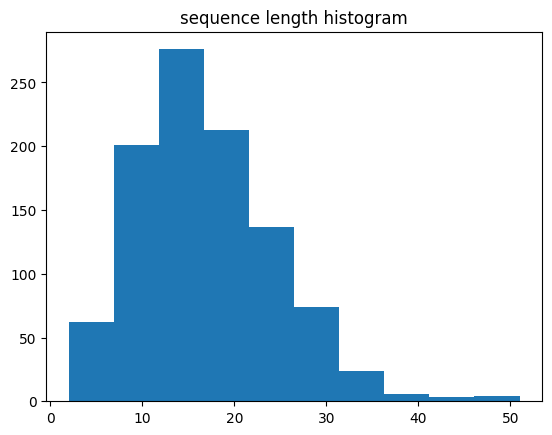

In [ ]:
#sequence는 1000개의 문장에서 1문장의 토큰을 묶어 []로 2번째도 묶어 []로 이중 리스트로 저장, [len(x) for x in sequences] 는 각각의 문장이 몇개의 단어로 이루어지는가 의미
#%%
plt.hist([len(x) for x in sequences])
plt.title('sequence length histogram')
plt.show()

In [ ]:
# from scipy.stats import mode 촤대 길이 문장
all_context_window = np.max([len(x) for x in sequences])

In [ ]:
all_context_window

51

In [ ]:
vocab_reverse = {i:x for x,i in vocab.items()}
vocab_size = len(vocab)

In [ ]:
#문장이 10개의 토큰이 있다면 target을 10번 바꾸기 가능!
#%%
'''CBOW context, target 생성'''
targets = []
contexts = []
#문장 전체의 context모아둔 리스트
all_contexts = []
#감성단어에 대한 레이블
labels = []
# target과 주변단어의 인덱스 길이
window_size = 4

for num in tqdm(range(len(sequences))):
    sent = sequences[num] #첫 문장을 가져와 sent에 저장
    l = len(sent) # 주어진 문장의 길이 #문장의 길이만큼 target단어가 있음!!!
    #target을 바꾸면서 주변단어를 context에 저장함!
    for index in range(l): # 주어진 문장의 길이 #문장의 길이만큼 target단어가 있음!!! 따라서 문장길이 만큼  for문
        s = index - window_size # window 시작 위치
        e = index + window_size + 1 # window 끝 위치
        #context:주변단어리스트
        context = []
        for i in range(s, e):
            if 0 <= i < l and i != index: # window가 주어진 문장의 길이를 벗어나지 않고, 중심에 있는 단어(target)가 아닐 경우
                context.append(sent[i])
        #contexts들은 ppt에서 x값들 의미
        contexts.append(context)
        #타겟단어 저장 ppt에서 y로 표현
        targets.append(sent[index])
        #sent(문장전체)를 저장
        all_contexts.append(sent)
        if sentiment[num] == 2: # 부정
            y = 0
        else: # 긍정
            y = 1
        #감정을 label에 추가
        labels.append(float(y))

print("")
print("length of contexts:", len(contexts))
print("length of targets:", len(targets))
print("length of all_contexts:", len(all_contexts))
print("length of labels:", len(labels))

100%|██████████| 1000/1000 [00:00<00:00, 2794.70it/s]


length of contexts: 16667
length of targets: 16667
length of all_contexts: 16667
length of labels: 16667


In [ ]:
contexts[0]

[110, 939, 54, 465]

In [ ]:
targets[0]

45

In [ ]:
#padding을 어디다 넣을건지는 상관없으나 통일해야함! contexts가 첫단어와 끝단어는 길이가 짧으므로 windowsize *2보다 작다면 padding으로 늘려주기! post면 뒤에 pre면 앞에 생긴다!!!!  1237  378 1878  941  378 1879  942  417  379    0    0    0    0    0 같이
#pre앞 post이후
#%%
contexts = tf.keras.preprocessing.sequence.pad_sequences(contexts,
                                                        maxlen=window_size*2, #길이를 windowsize *2로 맞추기
                                                        dtype='int32',
                                                        padding='post',
                                                        value=0) #추가되는 값은 0으로 pad를 0으로 정의했기 때문에

all_contexts = tf.keras.preprocessing.sequence.pad_sequences(all_contexts,
                                                        maxlen=all_context_window,
                                                        dtype='int32',
                                                        padding='post',
                                                        value=0)
#target 변수를 one-hot인코딩 실시!
targets = tf.one_hot(targets, depth=len(vocab))


In [ ]:
print("context[0]:", contexts[0])
print("all_contexts:", all_contexts[0])
print("targets[0]:", targets[0])
#첫번째 문서:target[0]이면 첫번째 문서 타겟  --> x_it가 원핫벡터로 targets[0]: tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(4318,), dtype=float32) 의미
#c_it 110 939  54 465 주변단어 의미

context[0]: [110 939  54 465   0   0   0   0]
all_contexts: [  45  110  939   54  465   10   86 1235  294  163  466  192  940 1236
 1237  378 1878  941  378 1879  942  417  379    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
targets[0]: tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(4318,), dtype=float32)


In [ ]:
all_contexts[0]

array([  45,  110,  939,   54,  465,   10,   86, 1235,  294,  163,  466,
        192,  940, 1236, 1237,  378, 1878,  941,  378, 1879,  942,  417,
        379,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
#optimize 하는 부분 128개를 batch로
#%%
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((contexts, targets, all_contexts, labels)).shuffle(len(contexts), reshuffle_each_iteration=True).batch(batch_size)

In [ ]:
#단어가 있으면 단어를 2차원으로 바꾸겠다는 뜻 embedding = 2, embedding_layer는 슬라이드에서 U 매트릭스 기능 !
#%%
'''modeling'''
embedding_size = 2  #단어 1개가 대응되는 숫자의 수
embedding_layer = K.layers.Embedding(len(vocab), embedding_size) #len(vocab) 범주형 변수의 종류수, 카테고리형 변수를 숫자로 바꾸기!!!!

In [ ]:
print('length of tokines:', len(contexts[0]))
h = embedding_layer(contexts[10])
print(h)

length of tokines: 8
tf.Tensor(
[[ 0.00224119  0.00793898]
 [ 0.02960665 -0.00019007]
 [ 0.03739419  0.01274229]
 [-0.0157874  -0.0423492 ]
 [ 0.01931803 -0.01852331]
 [ 0.03255249 -0.04320501]
 [ 0.02757854  0.018379  ]
 [-0.04204855  0.02159751]], shape=(8, 2), dtype=float32)


In [ ]:
print('length of tokines:', len(contexts[0]))
h = embedding_layer(contexts[0:2])
print(h)
h.shape

length of tokines: 8
tf.Tensor(
[[[-4.4572663e-02 -3.2708514e-02]
  [-3.3867203e-02  4.4532571e-02]
  [-2.7857304e-02  3.4300040e-02]
  [-4.1811634e-02  9.3421116e-03]
  [-4.1467499e-02 -1.3352834e-02]
  [-4.1467499e-02 -1.3352834e-02]
  [-4.1467499e-02 -1.3352834e-02]
  [-4.1467499e-02 -1.3352834e-02]]

 [[ 5.9615821e-05  4.9858477e-02]
  [-3.3867203e-02  4.4532571e-02]
  [-2.7857304e-02  3.4300040e-02]
  [-4.1811634e-02  9.3421116e-03]
  [-2.2791898e-02 -3.6677789e-02]
  [-4.1467499e-02 -1.3352834e-02]
  [-4.1467499e-02 -1.3352834e-02]
  [-4.1467499e-02 -1.3352834e-02]]], shape=(2, 8, 2), dtype=float32)


TensorShape([2, 8, 2])

In [ ]:
K.layers.GlobalAveragePooling1D()(h)  #함수의 입력값을 h로 한 결과

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.03924735,  0.00025686],
       [-0.03133386,  0.00766211]], dtype=float32)>

In [ ]:
#len(vocab)은 output차원이며 softmax를 이용해 출력하겠다!
#4318개의 0과 1사이이고 합치면 1인 수를 만들어준다!
output_layer = K.layers.Dense(len(vocab), activation='softmax')
output_layer(h)[0,0,:]

<tf.Tensor: shape=(4318,), dtype=float32, numpy=
array([0.00023149, 0.00023141, 0.00023176, ..., 0.00023158, 0.00023124,
       0.00023139], dtype=float32)>

In [ ]:
output_layer = K.layers.Dense(len(vocab), activation='softmax') #simplelex값
sentiment_layer = K.layers.Dense(1, activation='sigmoid')

'''문맥 정보'''
context_input = K.layers.Input((window_size*2, )) #8의 input을 받는놈 즉 행이 8개 열은 조정 가능하므로 빈칸
context_h = K.layers.GlobalAveragePooling1D()(embedding_layer(context_input)) # context embedding vector들을 평균

all_context_input = K.layers.Input((all_context_window, ))
all_context_h = K.layers.GlobalAveragePooling1D()(embedding_layer(all_context_input)) # 문장 embedding vector들을 평균 8행(windowsize*2) 2열짜리가 다시 2차원 벡터로 변환된다!

h = context_h + all_context_h #주변정보 + 전체정보를 feature로 했다
target_output = output_layer(h) #output layer는 길이가 len(vocab)인 softmax 함수

'''감성 정보'''
sentiment_output = sentiment_layer(all_context_h)
#
model = K.models.Model([context_input, all_context_input], [target_output, sentiment_output]) #인풋이 주변정보와 문장정보 2개, 아웃풋은 target_output(y hat의미),sentimet_output(감정추정값)

train_dataset 은 contexts, target, all_contexts, labels로 구성되어 있다. train_dataset 에서 하나의 샘플을 추출하면, 네 개의 구성요소의 샘플들을 얻을 수 있다.

In [ ]:
#%%
'''modeling'''
embedding_size = 32
def build_model(embedding_size):
    embedding_layer = K.layers.Embedding(len(vocab), embedding_size)
    output_layer = K.layers.Dense(len(vocab), activation='softmax')
    sentiment_layer = K.layers.Dense(1, activation='sigmoid')

    '''문맥 정보'''
    context_input = K.layers.Input((window_size*2, ))
    context_h = K.layers.GlobalAveragePooling1D()(embedding_layer(context_input)) # context embedding vector들을 평균

    all_context_input = K.layers.Input((all_context_window, ))
    all_context_h = K.layers.GlobalAveragePooling1D()(embedding_layer(all_context_input)) # 문장 embedding vector들을 평균

    h = context_h + all_context_h
    target_output = output_layer(h)

    '''감성 정보'''
    sentiment_output = sentiment_layer(all_context_h)

    model = K.models.Model([context_input, all_context_input], [target_output, sentiment_output])

    # model.summary()

    return model
#%%


In [ ]:
input_shape = (2, 3, 4)
x = tf.random.normal(input_shape)

Input 에 feature값을 참조하여 average값은 반환하는 메소드

Input shape:
- If data_format='channels_last': 3D tensor with shape: (batch_size, steps, features)
- If data_format='channels_first': 3D tensor with shape: (batch_size, features, steps)

Output shape:

- If keepdims=False: 2D tensor with shape (batch_size, features).
- If keepdims=True:
 - If data_format='channels_last': 3D tensor with shape (batch_size, 1, features)
 - If data_format='channels_first': 3D tensor with shape (batch_size, features, 1)

In [ ]:
x


<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
array([[[ 0.67748904,  1.6623014 , -0.17188586,  1.9654675 ],
        [-0.00529248,  1.3151137 , -1.027802  , -0.49731788],
        [-1.884371  ,  0.8261093 ,  1.2338676 ,  0.40036297]],

       [[-0.40221158, -1.332043  , -1.2443985 , -0.35412398],
        [-0.47769964,  0.30419096,  2.4211028 , -0.6996597 ],
        [-0.08663423,  1.2630657 , -0.8666049 ,  0.80513984]]],
      dtype=float32)>

In [ ]:
y = tf.keras.layers.GlobalAveragePooling1D()(x)
print(y.shape)


(2, 4)


In [ ]:
y

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.40405813,  1.2678415 ,  0.01139327,  0.6228375 ],
       [-0.3221818 ,  0.07840455,  0.10336646, -0.08288127]],
      dtype=float32)>

In [ ]:

optimizer = K.optimizers.Adam(0.001)
model = build_model(embedding_size)

@tf.function
def train_step(batch_context, batch_target, batch_all_contexts, batch_labels):
    with tf.GradientTape() as tape:
        context_pred, label_pred = model([batch_context, batch_all_contexts])
        context_loss = tf.reduce_mean(tf.reduce_sum(batch_target * tf.math.log(tf.clip_by_value(context_pred, 1e-10, 1.)), axis=1))
        sentiment_loss = batch_labels[:, tf.newaxis] * tf.math.log(tf.clip_by_value(label_pred, 1e-10, 1.))
        sentiment_loss += (1. - batch_labels[:, tf.newaxis]) * tf.math.log(tf.clip_by_value(1. - label_pred, 1e-10, 1.))
        sentiment_loss = tf.reduce_mean(sentiment_loss)
        loss = beta * context_loss + (1. - beta) * sentiment_loss
    grad = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grad, model.trainable_weights))
    return loss, context_loss, sentiment_loss
#%%


In [ ]:

iterator = iter(train_dataset)
beta = 0.99

iteration = 1000
step = 0
progress_bar = tqdm(range(iteration))
progress_bar.set_description('iteration {}/{} | current loss ?'.format(step, iteration))

for _ in progress_bar:
    try:
        batch_context, batch_target, batch_all_contexts, batch_labels = next(iterator)
    except:
        iterator = iter(train_dataset)
        batch_context, batch_target, batch_all_contexts, batch_labels = next(iterator)

    loss, context_loss, sentiment_loss = train_step(batch_context, batch_target, batch_all_contexts, batch_labels)

    progress_bar.set_description('iteration {}/{} | loss {:.3f}, context {:.3f}, sentiment {:.3f}'.format(
        step, iteration,
        loss.numpy(), context_loss.numpy(), sentiment_loss.numpy()))

    step += 1

    if step == iteration: break
#%%
#'''save embedding matrix'''
#np.save('./assets/embedding_matrix_{}'.format(beta), embedding_matrix)
#%%

iteration 999/1000 | loss -22.890, context -23.026, sentiment -9.394: 100%|█████████▉| 999/1000 [00:36<00:00, 27.27it/s]


In [ ]:
embedding_matrix = model.layers[2].weights[0]
embedding_matrix = embedding_matrix.numpy()
embedding_matrix.shape


(4318, 32)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        multiple             138176      ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 global_average_pooling1d_4 (Gl  (None, 32)          0           ['embedding_1[0][0]']      